# Лабораторная работа №11 “Реализация криптографических атак с помощью машинного обучения на физически неклонируемые функции”

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import zipfile
import matplotlib.pyplot as plt
from functools import reduce

## Task 1

1. Обучите модель, которая могла бы предсказывать ответы по запросам, которых нет в обучающей выборке.

In [2]:
def load_data_for_base(base=8, max_count=1000, is_xor=False):
    archive_name = "Data\Lab 11\Base{}.zip".format(base)
    archive = zipfile.ZipFile(archive_name, 'r')
    X, y = [], []
    counter = 0
    with archive.open('Base{}.txt'.format(base)) as file:
        for line in file.readlines():
            if counter >= max_count:
                break
            line = line.decode("utf-8")
            x_line = line.split()[0]
            y_line = line.split()[1]
            if is_xor:
                X.append(xor_data(x_line))
            else:
                X.append(list(x_line))
            y.append(y_line)
            counter += 1
    return np.array(X, dtype=int), np.array(y, dtype=int).ravel()

In [3]:
def learn_model(X, y, model, is_need_measure=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if is_need_measure:
        return model, accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)
    return model, accuracy_score(y_test, y_pred)

In [4]:
def xor_data(x):
    res = []
    cur_xor = reduce(lambda summator, bit: summator ^ int(bit), x, 0)
    for i in x:
        cur_xor ^= int(i)
        res.append(cur_xor)
    cur_xor = 0
    for i in x:
        cur_xor ^= int(i)
        res.append(cur_xor)
    return res

2. Применить как минимум 3 различных алгоритма (например, метод опорных векторов, логистическая регрессия и градиентный бустинг).

#### Логистическая регрессия

In [47]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
X, y = load_data_for_base(64, 1e5)
learned_model, score = learn_model(X, y, model)
print(score)

0.54575


In [54]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
X, y = load_data_for_base(64, 1e5, is_xor=True)
learned_model, score = learn_model(X, y, model)
print(score)

0.99295


#### Метод опорных векторов

In [10]:
model = LinearSVC(max_iter=10000, random_state=6, verbose=5)
X, y = load_data_for_base(64, 1e5)
learned_model, score = learn_model(X, y, model)
print(score)

[LibLinear]0.54575


In [49]:
model = LinearSVC(max_iter=10000, random_state=6, verbose=5)
X, y = load_data_for_base(64, 1e5, is_xor=True)
learned_model, score = learn_model(X, y, model)
print(score)

[LibLinear]0.9929


#### Градиентный бустинг 

In [50]:
model = DecisionTreeClassifier(min_samples_leaf=3)
X, y = load_data_for_base(64, 1e5)
learned_model, score = learn_model(X, y, model)
print(score)

0.561


In [52]:
model = DecisionTreeClassifier(min_samples_leaf=3)
X, y = load_data_for_base(64, 1e5, is_xor=True)
learned_model, score = learn_model(X, y, model)
print(score)

0.64535


3. Какая метрика наиболее подходит для оценки качества алгоритма?

Для обработанных XOR

In [42]:
accuracy_scores=[]
f1_scores = []
precision_scores=[]
recall_scores = []
for base in range(8, 130, 16):
    model = LogisticRegression(solver='lbfgs', multi_class='auto')
    X, y = load_data_for_base(base, 1e5, is_xor=True)
    learned_model, _accuracy_score, _f1_score, _precision_score, _recall_score = learn_model(X, y, model, is_need_measure=True)
    accuracy_scores.append([base, _accuracy_score])
    f1_scores.append([base, _f1_score])
    precision_scores.append([base, _precision_score])
    recall_scores.append([base, _recall_score])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


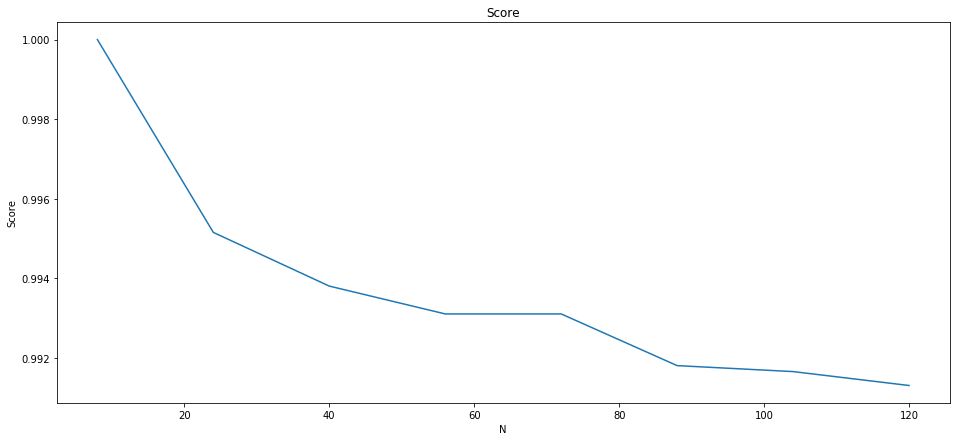

In [43]:
accuracy_scores = np.array(accuracy_scores)
plt.figure(figsize=(16, 7))
plt.plot(accuracy_scores[:,0], accuracy_scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

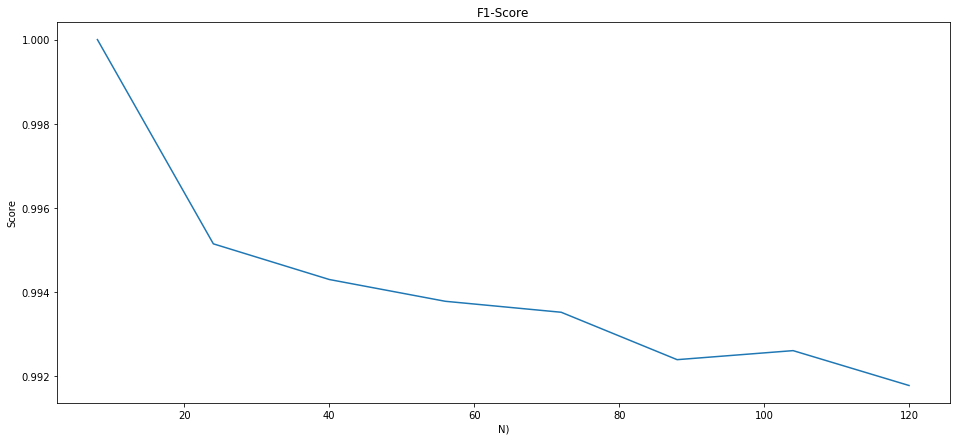

In [44]:
f1_scores = np.array(f1_scores)
plt.figure(figsize=(16, 7))
plt.plot(f1_scores[:,0], f1_scores[:,1])
plt.title('F1-Score')
plt.xlabel('N)')
plt.ylabel('Score')
plt.show()

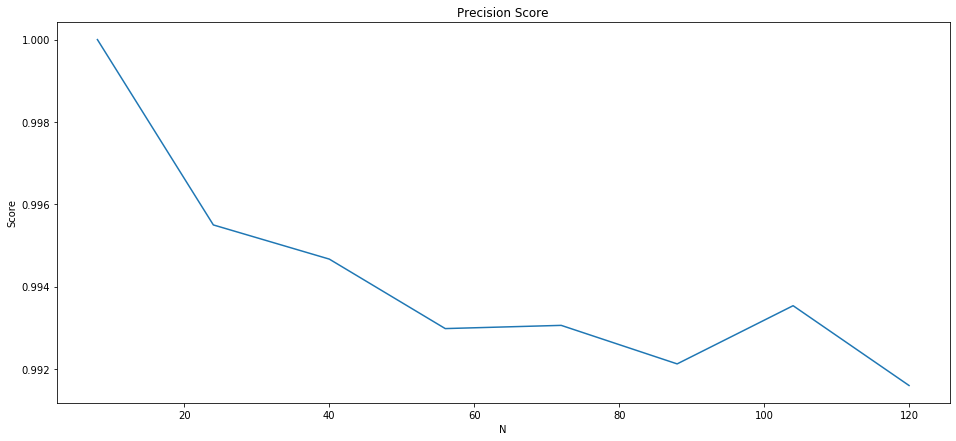

In [45]:
precision_scores = np.array(precision_scores)
plt.figure(figsize=(16, 7))
plt.plot(precision_scores[:,0], precision_scores[:,1])
plt.title('Precision Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

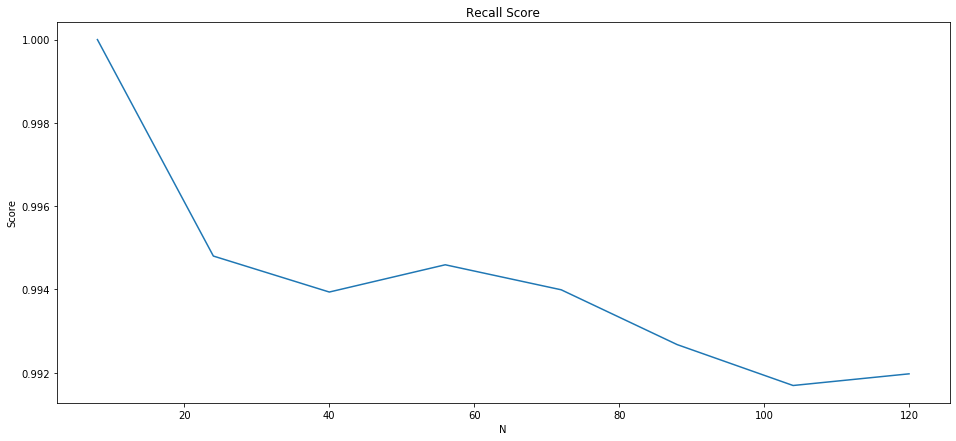

In [46]:
recall_scores = np.array(recall_scores)
plt.figure(figsize=(16, 7))
plt.plot(recall_scores[:,0], recall_scores[:,1])
plt.title('Recall Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

Для исходных данных

In [156]:
accuracy_scores=[]
f1_scores = []
precision_scores=[]
recall_scores = []
for base in range(8, 130, 16):
    model = LogisticRegression(solver='lbfgs', multi_class='auto')
    X, y = load_data_for_base(base, 1e5)
    learned_model, _accuracy_score, _f1_score, _precision_score, _recall_score = learn_model(X, y, model, is_need_measure=True)
    accuracy_scores.append([base, _accuracy_score])
    f1_scores.append([base, _f1_score])
    precision_scores.append([base, _precision_score])
    recall_scores.append([base, _recall_score])

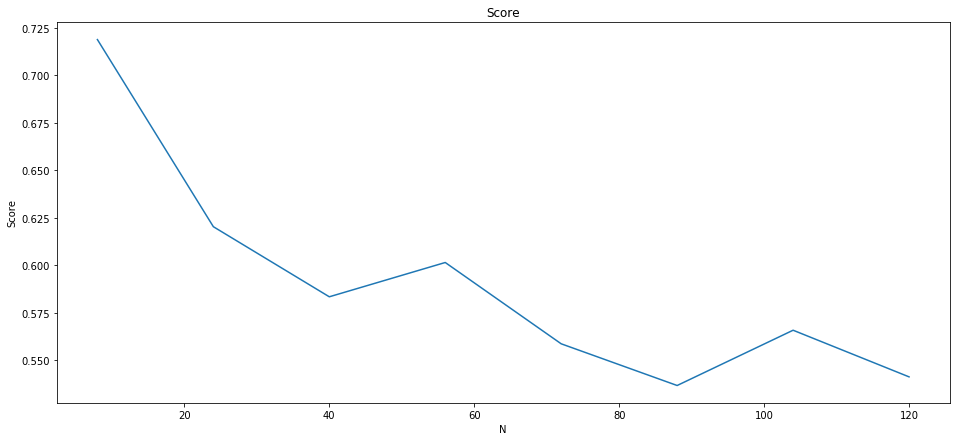

In [157]:
accuracy_scores = np.array(accuracy_scores)
plt.figure(figsize=(16, 7))
plt.plot(accuracy_scores[:,0], accuracy_scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

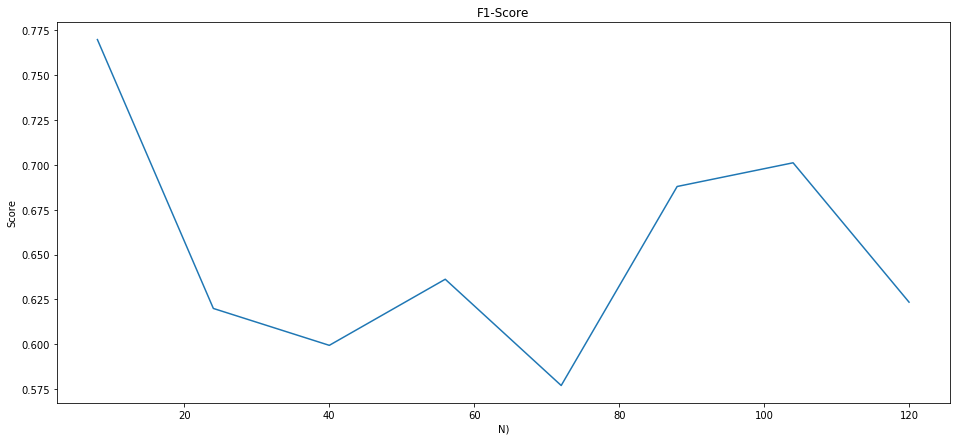

In [158]:
f1_scores = np.array(f1_scores)
plt.figure(figsize=(16, 7))
plt.plot(f1_scores[:,0], f1_scores[:,1])
plt.title('F1-Score')
plt.xlabel('N)')
plt.ylabel('Score')
plt.show()

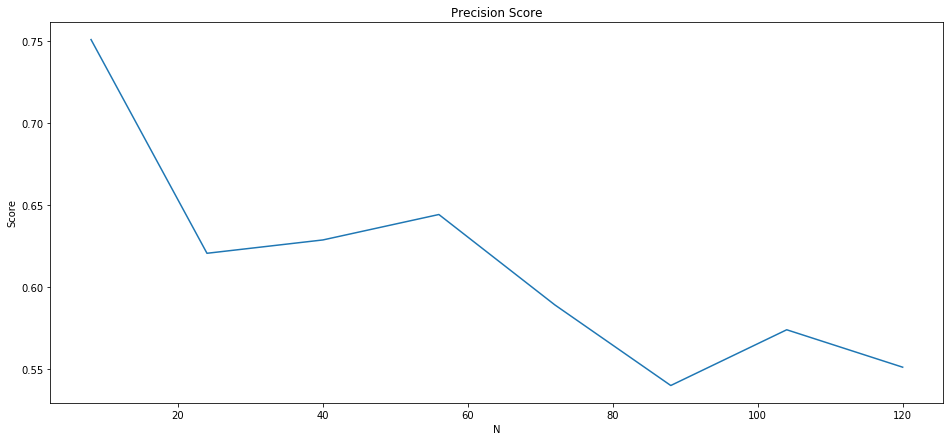

In [159]:
precision_scores = np.array(precision_scores)
plt.figure(figsize=(16, 7))
plt.plot(precision_scores[:,0], precision_scores[:,1])
plt.title('Precision Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

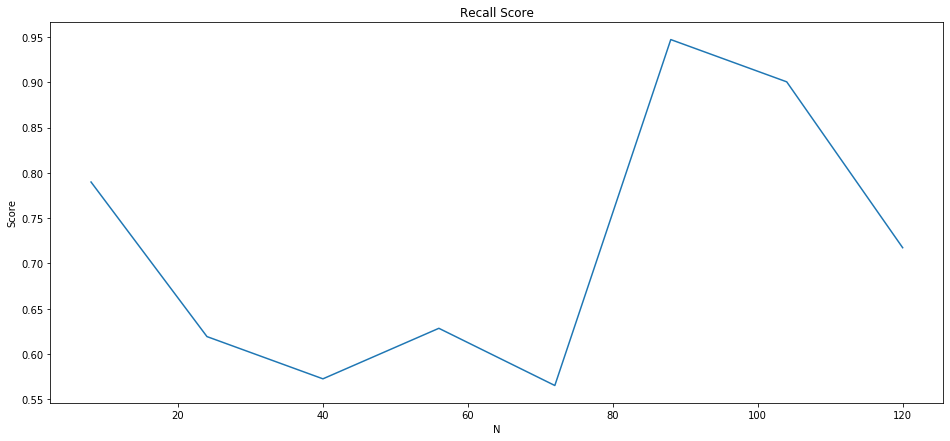

In [160]:
recall_scores = np.array(recall_scores)
plt.figure(figsize=(16, 7))
plt.plot(recall_scores[:,0], recall_scores[:,1])
plt.title('Recall Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

4. Какой наибольшей доли правильных ответов (Accuracy) удалось достичь?

In [169]:
accuracy_scores=[]
for base in range(8, 130, 16):
    model = LogisticRegression(solver='lbfgs', multi_class='auto')
    X, y = load_data_for_base(base, 1e5, is_xor=True)
    learned_model, _accuracy_score = learn_model(X, y, model)
    accuracy_scores.append([base, _accuracy_score])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


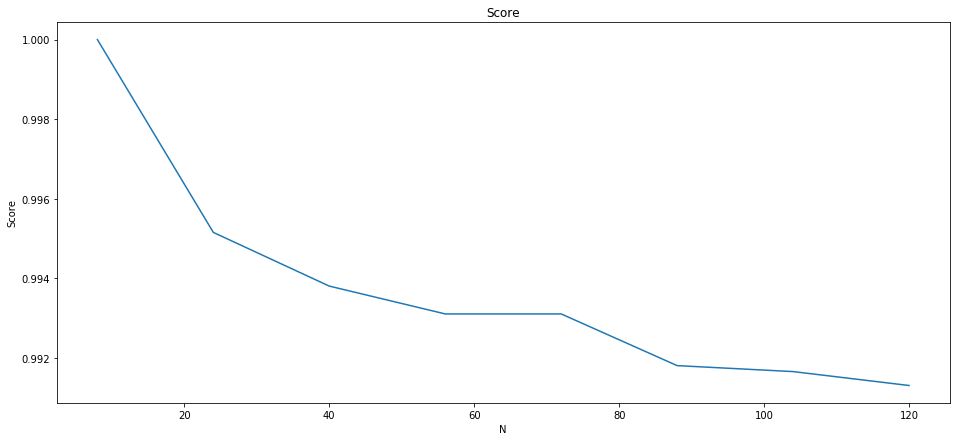

In [170]:
accuracy_scores = np.array(accuracy_scores)
plt.figure(figsize=(16, 7))
plt.plot(accuracy_scores[:,0], accuracy_scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

5. Какой размер обучающей выборки необходим, чтобы достигнуть доли правильных ответов минимум 0.95?

In [5]:
scores=[]
for ten_degree in range(1,7):
    sample_size = 10**ten_degree
    model = LogisticRegression(solver='lbfgs', multi_class='auto')
    X, y = load_data_for_base(16, sample_size)
    learned_model, score = learn_model(X, y, model)
    scores.append([ten_degree, score])

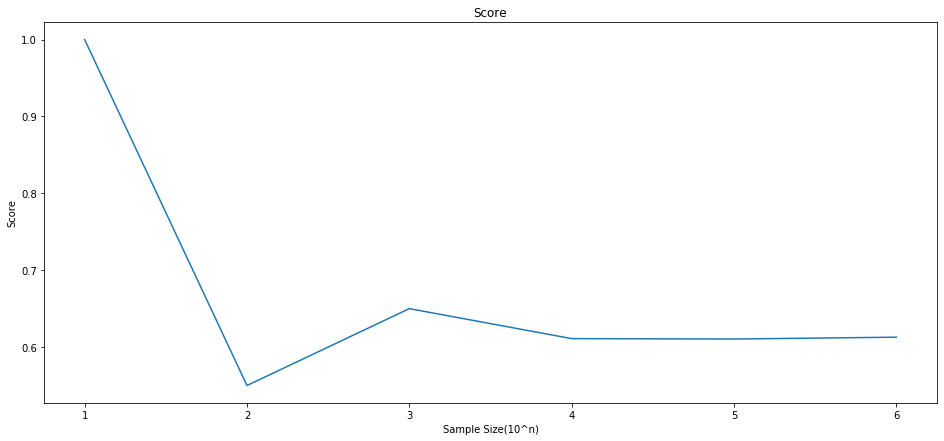

In [6]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('Sample Size(10^n)')
plt.ylabel('Score')
plt.show()

In [7]:
scores=[]
for ten_degree in range(1,7):
    sample_size = 10**ten_degree
    model = LogisticRegression(solver='lbfgs', multi_class='auto')
    X, y = load_data_for_base(16, sample_size, is_xor=True)
    learned_model, score = learn_model(X, y, model)
    scores.append([ten_degree, score])

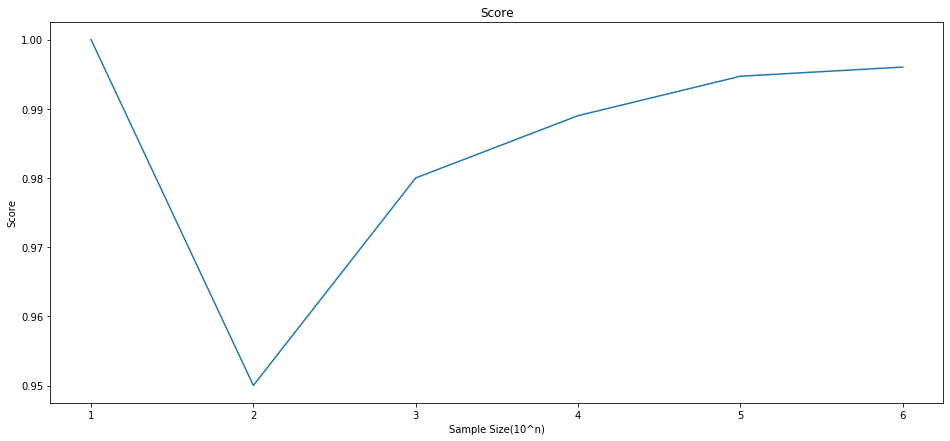

In [8]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('Sample Size(10^n)')
plt.ylabel('Score')
plt.show()

In [24]:
scores=[]
for ten_degree in range(1,7):
    sample_size = 10**ten_degree
    model = LinearSVC(max_iter=10000, random_state=6, verbose=5)
    X, y = load_data_for_base(16, sample_size)
    learned_model, score = learn_model(X, y, model)
    scores.append([ten_degree, score])

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

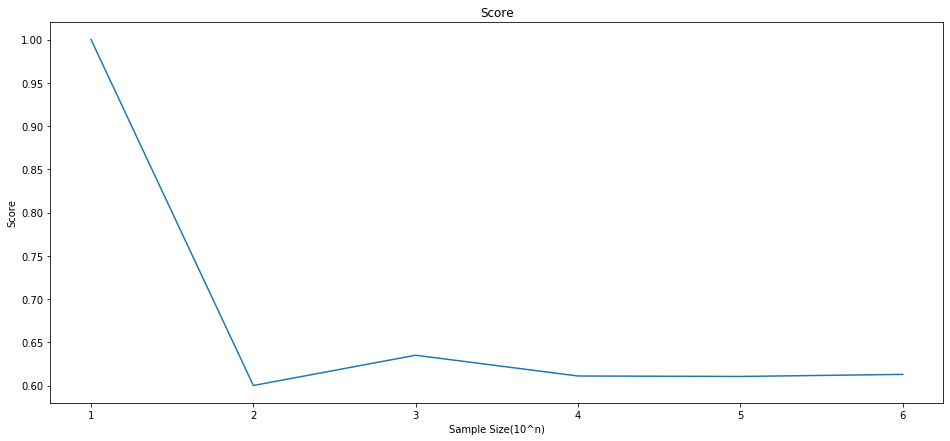

In [25]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('Sample Size(10^n)')
plt.ylabel('Score')
plt.show()

In [9]:
scores=[]
for ten_degree in range(1,7):
    sample_size = 10**ten_degree
    model = LinearSVC(max_iter=10000, random_state=6, verbose=5)
    X, y = load_data_for_base(16, sample_size, is_xor=True)
    learned_model, score = learn_model(X, y, model)
    scores.append([ten_degree, score])

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

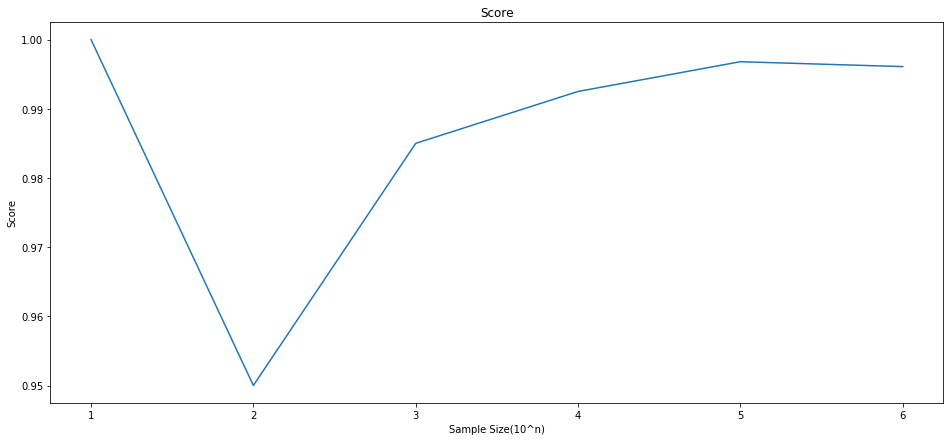

In [10]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('Sample Size(10^n)')
plt.ylabel('Score')
plt.show()

In [11]:
scores=[]
for ten_degree in range(1,7):
    sample_size = 10**ten_degree
    model = DecisionTreeClassifier(min_samples_leaf=3)
    X, y = load_data_for_base(16, sample_size)
    learned_model, score = learn_model(X, y, model)
    scores.append([ten_degree, score])

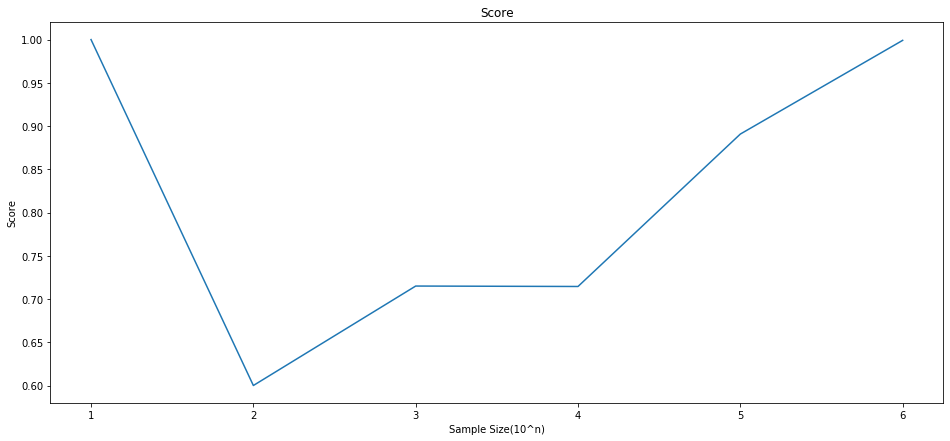

In [12]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('Sample Size(10^n)')
plt.ylabel('Score')
plt.show()

In [13]:
scores=[]
for ten_degree in range(1,7):
    sample_size = 10**ten_degree
    model = DecisionTreeClassifier(min_samples_leaf=3)
    X, y = load_data_for_base(16, sample_size, is_xor=True)
    learned_model, score = learn_model(X, y, model)
    scores.append([ten_degree, score])

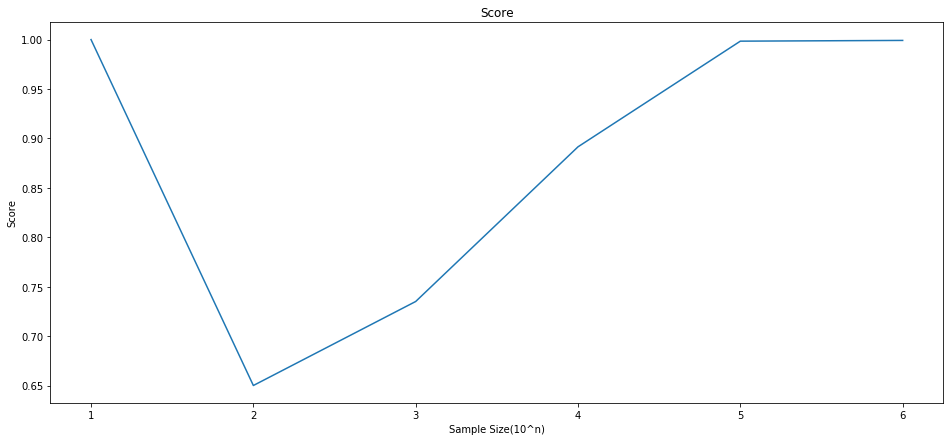

In [14]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('Sample Size(10^n)')
plt.ylabel('Score')
plt.show()

6. Как зависит доля правильных ответов от N?

In [17]:
scores=[]
for base in range(8, 130, 8):
    model = LogisticRegression(solver='lbfgs', multi_class='auto')
    X, y = load_data_for_base(base, 1e5)
    learned_model, score = learn_model(X, y, model)
    scores.append([base, score])

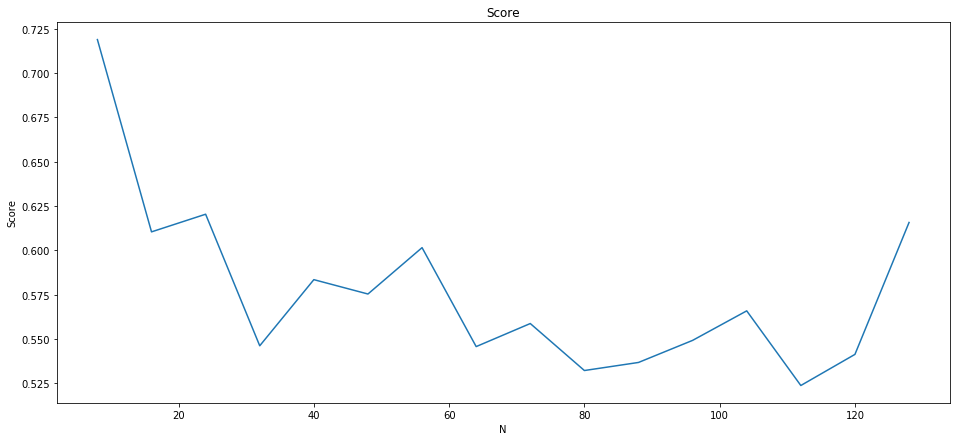

In [18]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

In [15]:
scores=[]
for base in range(8, 130, 8):
    model = LogisticRegression(solver='lbfgs', multi_class='auto')
    X, y = load_data_for_base(base, 1e5,is_xor=True)
    learned_model, score = learn_model(X, y, model)
    scores.append([base, score])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


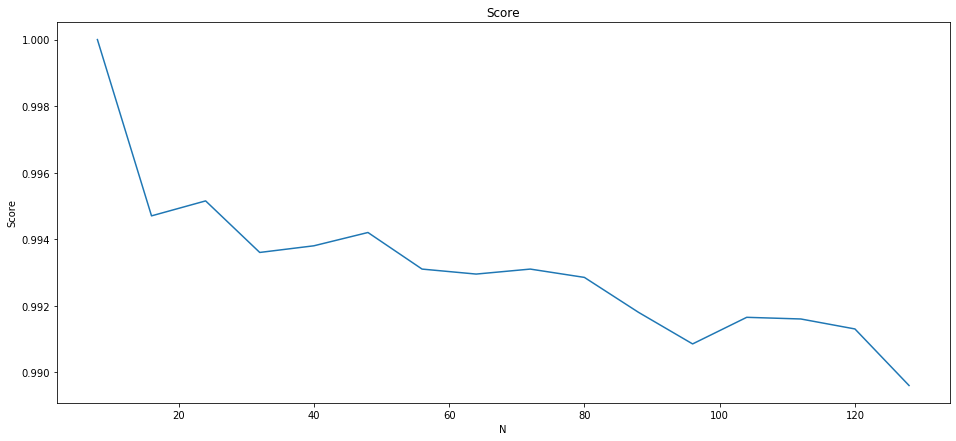

In [16]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

In [103]:
scores=[]
for base in range(8, 130, 8):
    model = LinearSVC(max_iter=10000, random_state=32, verbose=5)
    X, y = load_data_for_base(base, 1e5)
    learned_model, score = learn_model(X, y, model)
    scores.append([base, score])

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

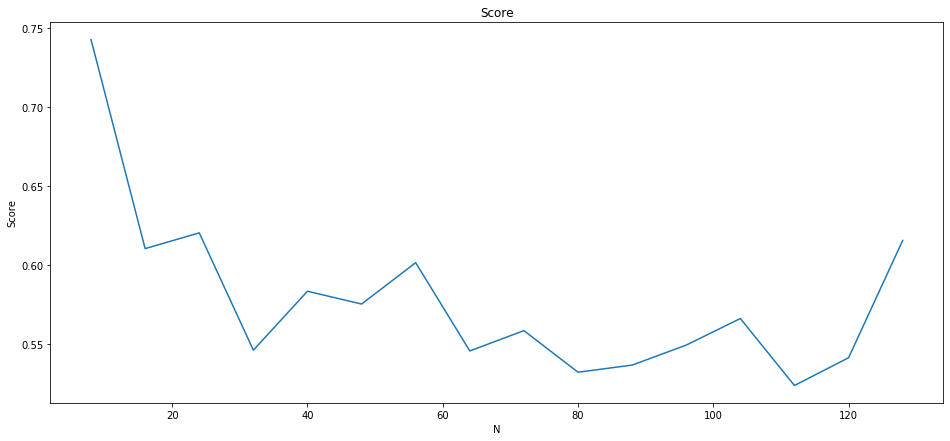

In [104]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

In [19]:
scores=[]
for base in range(8, 130, 8):
    model = LinearSVC(max_iter=10000, random_state=32, verbose=5)
    X, y = load_data_for_base(base, 1e5, is_xor=True)
    learned_model, score = learn_model(X, y, model)
    scores.append([base, score])

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

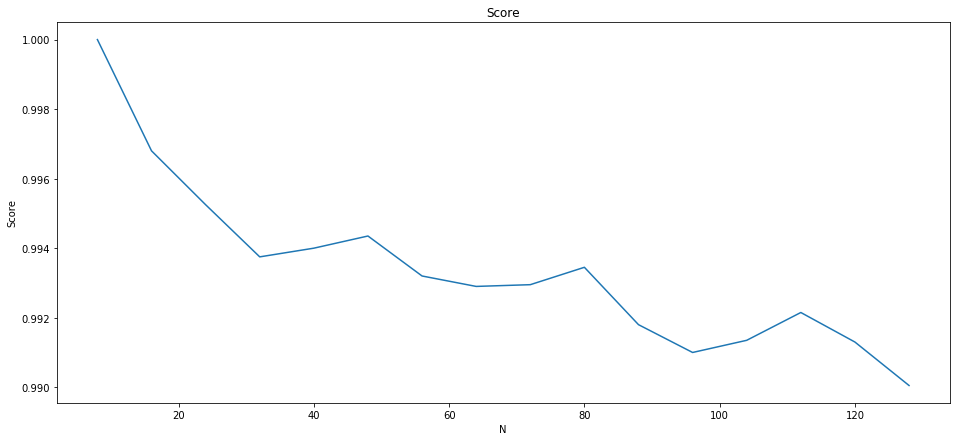

In [20]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

In [105]:
scores=[]
for base in range(8, 130, 8):
    model = DecisionTreeClassifier(min_samples_leaf=3)
    X, y = load_data_for_base(base, 1e5)
    learned_model, score = learn_model(X, y, model)
    scores.append([base, score])

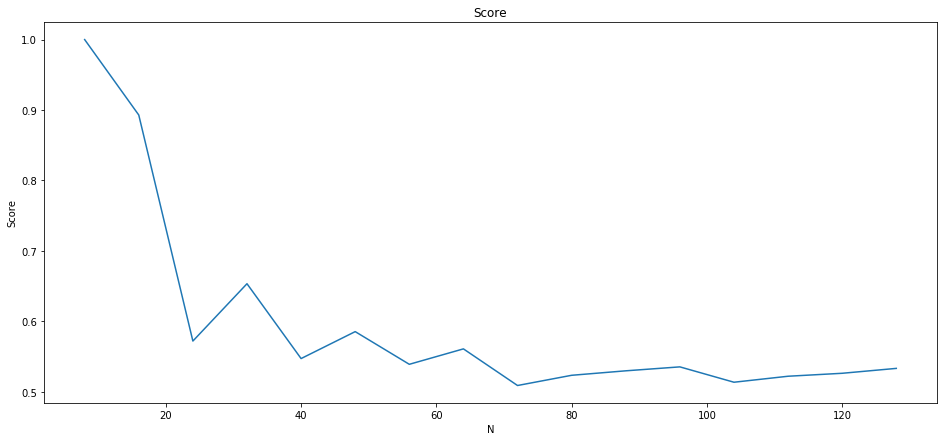

In [106]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()

In [21]:
scores=[]
for base in range(8, 130, 8):
    model = DecisionTreeClassifier(min_samples_leaf=3)
    X, y = load_data_for_base(base, 1e5, is_xor=True)
    learned_model, score = learn_model(X, y, model)
    scores.append([base, score])

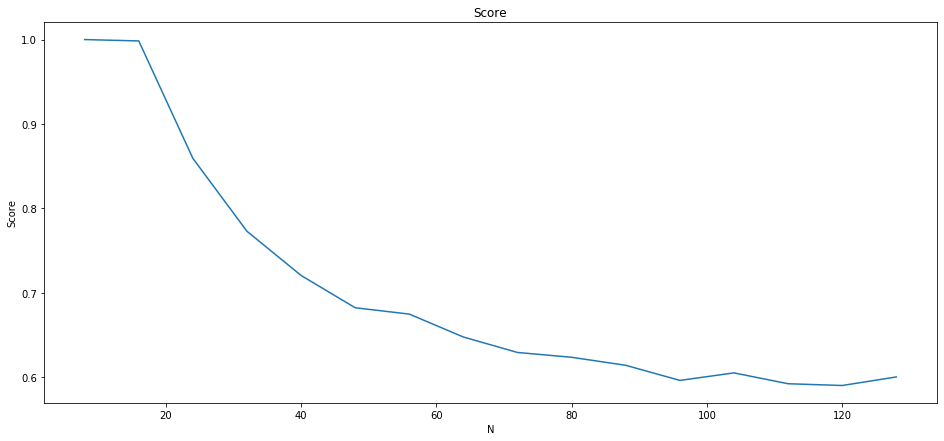

In [22]:
scores = np.array(scores)
plt.figure(figsize=(16, 7))
plt.plot(scores[:,0], scores[:,1])
plt.title('Score')
plt.xlabel('N')
plt.ylabel('Score')
plt.show()